In [1]:
"""
Description: assignment #4 for the python course. Instructions can be found
in ./description.txt
"""

'\nDescription: assignment #4 for the python course. Instructions can be found\nin ./description.txt\n'

## General imports

In [274]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from retrieve_time import Retrieve_Timestamps

## Define functions to read the data

In [3]:
#Define function to load dataframes and a decorator to
#summarize the data.

def explain_data(func):
    def inner(*args, **kwargs):
        fpath = args[0]
        assert os.path.isfile(fpath), 'Path passed does not contain a file.'
        _df = func(*args, **kwargs)
        assert isinstance(_df, pd.DataFrame), 'File passed cannot be parsed into a dataframe.'
        print('Summarizing the retrieved data from %s' %fpath, '\n')
        print('    *Dataframe shape is ', _df.shape, '\n')
        print('    *Dataframe columns are ', _df.columns, '\n')
        print('    *Dataframe sample is', _df.head(n=5), '\n')
        return _df
    return inner

@explain_data
def get_data(fpath):
    return pd.read_csv(fpath, header=0, low_memory=False)

## Challenge - plots

In [4]:
#Load the survey data.
df_survey = get_data('./data/surveys.csv')

Summarizing the retrieved data from ./data/surveys.csv 

    *Dataframe shape is  (35549, 9) 

    *Dataframe columns are  Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object') 

    *Dataframe sample is    record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   
3          4      7   16  1977        7         DM   M             36.0   
4          5      7   16  1977        3         DM   M             35.0   

   weight  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN   



#### Create a plot of average weight across all species per plot.

/home/heringer/anaconda2/envs/py37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


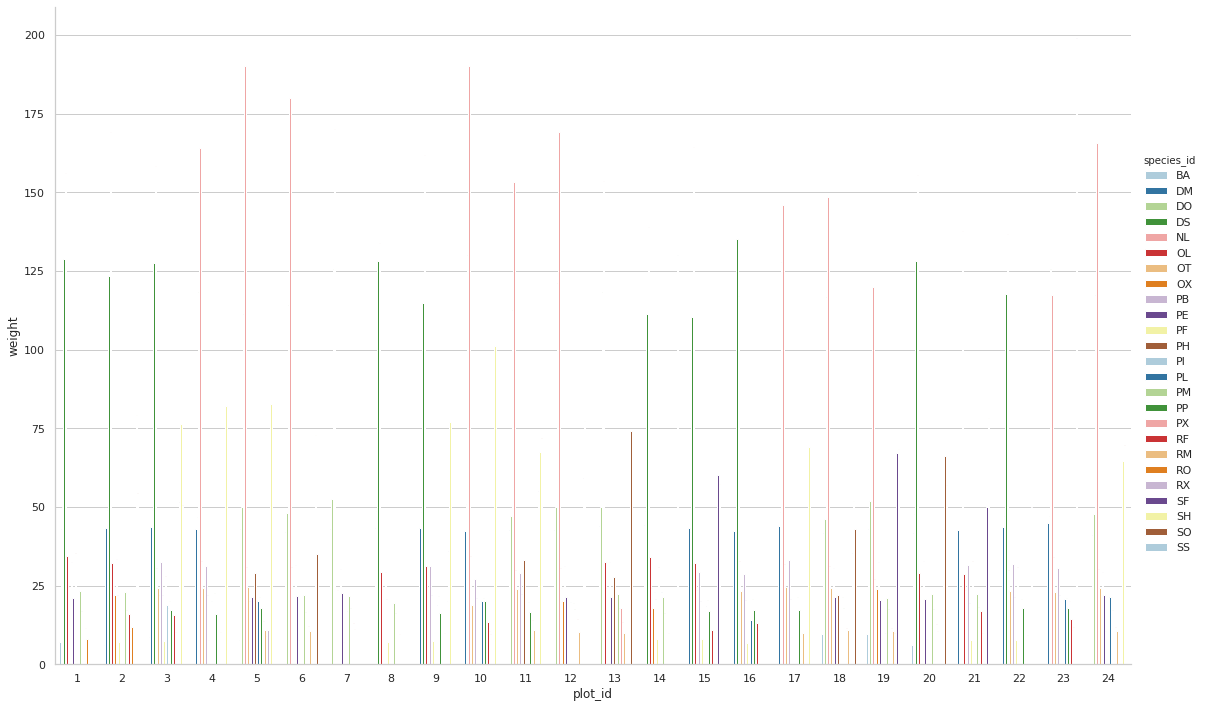

In [5]:
#Making a copy takes up more memory, but makes the code more readable.
#Unstacked bars are more meaningful here.

#Trimming for weight > 0 will remove spurious values.
df_aux = df_survey[df_survey['weight'] > 0.].copy()
df_aux = df_aux.groupby(['species_id', 'plot_id'])['weight'].mean()

#Method 1 (for personal reference).
#ax = df_aux.unstack().plot(kind='bar')

#Method 2 (with seaborn).
#See https://stackoverflow.com/questions/31845258/pandas-multi-index-plotting
sns.set(style='whitegrid')
df_aux = pd.DataFrame(df_aux).reset_index()
#fg = sns.factorplot(x='species_id', y='weight', hue='plot_id', data=df_aux,
#                    kind='bar', height=6., aspect=3., palette=sns.color_palette("Paired"))
fg = sns.factorplot(x='plot_id', y='weight', hue='species_id', data=df_aux,
                    kind='bar', height=10., aspect=1.6, palette=sns.color_palette("Paired"))


#### Use all species for average weight

Text(0, 0.5, 'Average weight using all species')

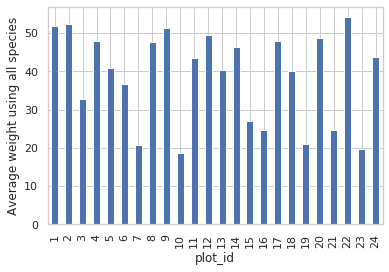

In [6]:
#Trimming for weight > 0 will remove spurious values.
df_aux = df_survey[df_survey['weight'] > 0.].copy()
df_aux = df_aux.groupby(['plot_id'])['weight'].mean()

#Method 1 (for personal reference).
ax = df_aux.plot(kind='bar')
ax.set_ylabel('Average weight using all species')

#### Create a plot of total males versus total females for the entire dataset.

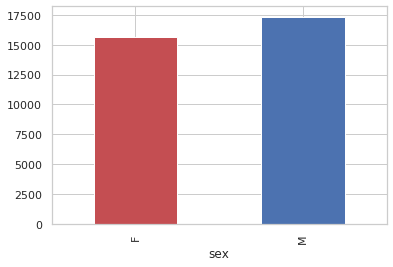

In [7]:
df_survey.groupby(['sex']).count()['record_id'].plot(kind='bar', color=['r', 'b'])

## Titanic

In [8]:
#Load the titanic data.
df_titanic = get_data('./data/Titanic_data.csv')

Summarizing the retrieved data from ./data/Titanic_data.csv 

    *Dataframe shape is  (891, 12) 

    *Dataframe columns are  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 

    *Dataframe sample is    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     

#### Explore the data

In [9]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Non null values for each attribute.
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
#Drop the name column. Unlikely to be relevant.
df_titanic = df_titanic.drop(['Name'], axis=1)

In [12]:
#Removing nan from remaing columns. This is not ideal, but following
#along the instructions for reproducibility.
print(df_titanic.shape)
df_titanic_trim = df_titanic.dropna(axis=0)
print(df_titanic_trim.shape)

(891, 11)
(183, 11)


In [13]:
#Count of survivors.
df_survivors = df_titanic.groupby(['Survived']).count()['PassengerId']
print('Survived: %i' %df_survivors[1])
print('Did not survive: %i' %df_survivors[0])

Survived: 342
Did not survive: 549


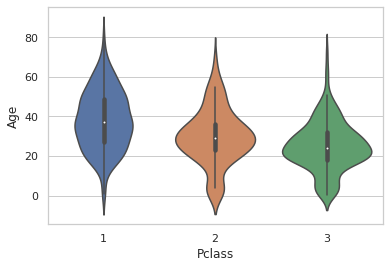

In [14]:
#Age distribution within classes.

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Age', 'Pclass'], how='all')
sns.violinplot(x=df_aux.Pclass, y=df_aux.Age)


Text(0, 0.5, 'Count')

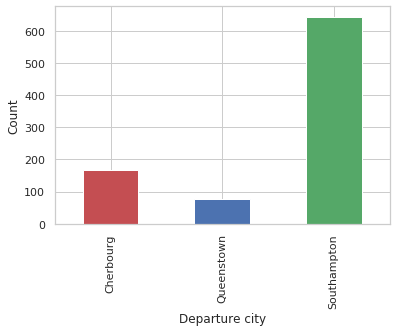

In [15]:
#Passengers per boarding location.

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Embarked'], how='all')

#Replace abbrev with port names.
df_aux = df_aux.replace({'Embarked': {'S':'Southampton', 'Q':'Queenstown', 'C':'Cherbourg'}})
ax = df_aux.groupby('Embarked').count()['PassengerId'].plot(kind='bar', color=['r', 'b', 'g'])
ax.set_xlabel('Departure city')
ax.set_ylabel('Count')

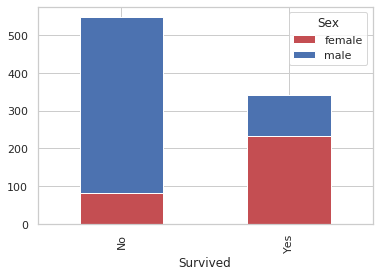

In [16]:
#Who Survived? with respect to Gender, (raw value counts)

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Survived', 'Sex'], how='all')
df_aux = df_aux.replace({'Survived': {0:'No', 1:'Yes'}})

df_survivors = df_aux.groupby(['Survived','Sex']).count()['PassengerId']
df_survivors.unstack().plot(kind='bar', color=['r', 'b'], stacked=True)

In [17]:
#Survived. Raw and proportional counts.
df_aux = df_titanic.dropna(subset=['Survived', 'Sex'], how='all')
df_aux = df_aux[df_aux['Survived']==1]
N_survivors = df_aux.shape[0]

df_aux = df_aux[df_aux['Sex']=='female']
F_survived = float(df_aux.shape[0])
M_survived = N_survivors - F_survived

print('Among survivors, %i (%.3f%%) were females'
      %(F_survived, 100.*F_survived/N_survivors))
print('Among survivors, %i (%.3f%%) were males'
      %(M_survived, 100.*M_survived/N_survivors))

Among survivors, 233 (68.129%) were females
Among survivors, 109 (31.871%) were males


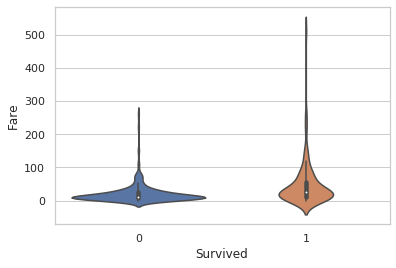

In [18]:
#Extra. Does survivability correlate with the paid fare?

#Drop na in the relevant columns.
df_aux = df_titanic.dropna(subset=['Fare', 'Survived'], how='all')
sns.violinplot(x=df_aux.Survived, y=df_aux.Fare)


Text(0, 0.5, 'Average Fair')

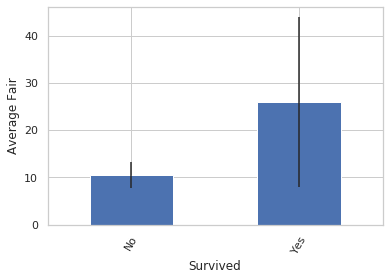

In [19]:
#There is a strong correlation between fair price and survivability.

surv_fare = df_aux[df_aux['Survived']==1].Fare
notsurv_fare = df_aux[df_aux['Survived']==0].Fare

surv_q = np.quantile(surv_fare.values,q=(0.16,0.5,0.84))
notsurv_q = np.quantile(notsurv_fare.values,q=(0.16,0.5,0.84))

df_new = pd.DataFrame({'Survived':['No', 'Yes'],
                       'Average Fair':[notsurv_q[1], surv_q[1]]})
yerr = [[notsurv_q[1] - notsurv_q[0],surv_q[1] - surv_q[0]],
        [notsurv_q[2] - notsurv_q[1],surv_q[2] - surv_q[1]]]

ax = df_new.plot.bar(x='Survived', y='Average Fair', yerr=yerr, rot=60)
ax.get_legend().remove()
ax.set_ylabel('Average Fair')


## Movies

In [79]:
#### Read the data
#File downloaded from http://files.grouplens.org/datasets/movielens/ml-100k/u.data

fpath = './data/movies_data.dat'
df_data = pd.read_csv(fpath, delim_whitespace=True, low_memory=False,
                        names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])

fpath = './data/movies_user.dat'
df_user = pd.read_csv(fpath, sep='|', low_memory=False,
                        names=['user_id', 'age', 'sex', 'occupation', 'zip_code'])

#The separation is awkward for this file. Use | and get the 4 first cols.
fpath = './data/movies_item.dat'
df_item = pd.read_csv(fpath, sep='|', low_memory=False, encoding='ISO-8859–1')
df_item = df_item.iloc[:,0:4]
df_item.columns = ['movie_id', 'title', 'release_date','video_release_date']

#### merge dataframes in a master dataframe.

In [119]:
#Merge dataframes on user_id to add information on users and movies.
#If no match, store NaN (i.e., merge on the left dataframe.)

df_master = pd.merge(df_data, df_user, on='user_id', how='left')
df_master = pd.merge(df_master, df_item, on='movie_id', how='left')
print(df_master.head(n=5))

   user_id  movie_id  rating  unix_timestamp  age sex  occupation zip_code  \
0      196       242       3       881250949   49   M      writer    55105   
1      186       302       3       891717742   39   F   executive    00000   
2       22       377       1       878887116   25   M      writer    40206   
3      244        51       2       880606923   28   M  technician    80525   
4      166       346       1       886397596   47   M    educator    55113   

                        title release_date  video_release_date  
0                Kolya (1996)  24-Jan-1997                 NaN  
1    L.A. Confidential (1997)  01-Jan-1997                 NaN  
2         Heavyweights (1994)  01-Jan-1994                 NaN  
3  Legends of the Fall (1994)  01-Jan-1994                 NaN  
4         Jackie Brown (1997)  01-Jan-1997                 NaN  


#### Explore the data

In [95]:
#show users aged 40 and male

#Can use df_user, which has unique entries.
df_aux = df_user[((df_user['sex']=='M') & (df_user['age']==40))]
N = df_aux.shape[0]
print('There are %i customers who are 40 yo and male.' %N)

#Or we can use the master dataframe, but carefully.
df_aux = df_master[((df_master['sex']=='M') & (df_master['age']==40))]
N = len(np.unique(df_aux.user_id))
print('There are %i customers who are 40 yo and male.' %N)

There are 14 customers who are 40 yo and male.
There are 14 customers who are 40 yo and male.


In [112]:
#show the mean age of female programmers
#print(df_master.columns)
df_aux = df_master[((df_master['sex']=='F') & (df_master['occupation']=='programmer'))]
df_aux = df_aux.drop_duplicates(subset='user_id', keep='last')
print('Mean age of female programmers = %.1f' %df_aux.age.mean())

#Note, if records include multiple years, keeping first or last entries
#may affect the mean age.

Mean age of female programmers = 32.2


In [139]:
#Find Diligent Users

#Let's find the top 1% movie goers. (This is roughly a top 10 in this case.)
df_aux = pd.DataFrame(df_master.groupby('user_id').size())
df_aux.columns = ['N_movies']
N_top = int(0.01 * df_user.shape[0])
print('1%% of users is %i' %N_top)
print('Top 10 movie goers are:')
print(df_aux.nlargest(10,'N_movies'))

1% of users is 9
Top 10 movie goers are:
         N_movies
user_id          
405           737
655           685
13            636
450           540
276           518
416           493
537           490
303           484
234           480
393           448


In [145]:
#get the average rating per movie
df_aux = df_master.groupby(['movie_id'])['rating'].mean()
print('The average rating per movie is:')
print(df_aux)

The average rating per movie is:
movie_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64


In [168]:
#get the movie titles with the highest average rating
df_aux = df_master.groupby(['movie_id'])['rating'].mean()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['mean_rating']
df_aux = df_aux.reset_index()
df_aux2 = pd.merge(df_aux.nlargest(20,'mean_rating'), df_item, on='movie_id', how='left')
print('Movies with the highest average rating:')
print(df_aux2[['title', 'mean_rating']])


Movies with the highest average rating:
                                                title  mean_rating
0                       Great Day in Harlem, A (1994)     5.000000
1                      They Made Me a Criminal (1939)     5.000000
2                                  Prefontaine (1997)     5.000000
3          Marlene Dietrich: Shadow and Light (1996)      5.000000
4                                     Star Kid (1997)     5.000000
5                Saint of Fort Washington, The (1993)     5.000000
6                           Santa with Muscles (1996)     5.000000
7                                Aiqing wansui (1994)     5.000000
8                       Someone Else's America (1995)     5.000000
9   Entertaining Angels: The Dorothy Day Story (1996)     5.000000
10                             Pather Panchali (1955)     4.625000
11             Maya Lin: A Strong Clear Vision (1994)     4.500000
12                                        Anna (1996)     4.500000
13                    

In [170]:
#get the average rating per user.
df_aux = df_master.groupby(['user_id'])['rating'].mean()
df_aux = pd.DataFrame(df_aux)
df_aux.columns = ['mean_rating']
print('Average rating per user:')
print(df_aux)

Average rating per user:
         mean_rating
user_id             
1           3.610294
2           3.709677
3           2.796296
4           4.333333
5           2.874286
...              ...
939         4.265306
940         3.457944
941         4.045455
942         4.265823
943         3.410714

[943 rows x 1 columns]


In [234]:
#list all occupations and if they are male or female dominant
df_aux = df_master.drop_duplicates(subset='user_id', keep='last')
df_aux = df_aux.groupby(['occupation'])['sex'].value_counts()
df_aux = df_aux.unstack(level=-1)
df_aux = df_aux.reset_index()
df_aux = df_aux.fillna(0)
#print(df_aux)
for index, row in df_aux.iterrows():
    prof, n_F, n_M = row['occupation'], row['F'], row['M']
    if n_F > n_M:
        print('%s is predominatly F with a ratio of %.1f%%' %(prof,100.*n_F/(n_F + n_M)))
    elif n_F < n_M:
        print('%s is predominatly M with a ratio of %.1f%%' %(prof,100.*n_M/(n_F + n_M)))
    elif n_F == n_M: 
        print('%s has 50%%-50%% M and F workers')

Occupation administrator is predominatly M with a ratio of 54.4%
Occupation artist is predominatly M with a ratio of 53.6%
Occupation doctor is predominatly M with a ratio of 100.0%
Occupation educator is predominatly M with a ratio of 72.6%
Occupation engineer is predominatly M with a ratio of 97.0%
Occupation entertainment is predominatly M with a ratio of 88.9%
Occupation executive is predominatly M with a ratio of 90.6%
Occupation healthcare is predominatly F with a ratio of 68.8%
Occupation homemaker is predominatly F with a ratio of 85.7%
Occupation lawyer is predominatly M with a ratio of 83.3%
Occupation librarian is predominatly F with a ratio of 56.9%
Occupation marketing is predominatly M with a ratio of 61.5%
Occupation none is predominatly M with a ratio of 55.6%
Occupation other is predominatly M with a ratio of 65.7%
Occupation programmer is predominatly M with a ratio of 90.9%
Occupation retired is predominatly M with a ratio of 92.9%
Occupation salesman is predominatly

## Scraping with Python

In [235]:
#Not completed.

## Sleep data - Part 1: warm up

In [275]:
#I will be using matplotlib for some plots in this section.
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

mpl.rcParams.update(mpl.rcParamsDefault)

#Set matplotlib variables for prettier plots.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
fs = 36. #fontsize.

%matplotlib inline




#### Colect and preprocess the data

In [276]:
#Read the sleep data.
fpath = './data/sleepdata.csv'
data = pd.read_csv(fpath, header=0, delimiter=';', index_col=False, low_memory=False)
time_format = '%Y-%m-%d %H:%M:%S'
print(data.head(n=5))

                 Start                  End Sleep quality Time in bed  \
0  2011-06-19 08:42:08  2011-06-19 13:22:13           51%        4:40   
1  2011-06-29 07:27:53  2011-06-29 12:39:43           57%        5:11   
2  2011-06-30 08:04:06  2011-06-30 10:51:15           34%        2:47   
3  2011-07-04 05:48:35  2011-07-04 12:27:00           73%        6:38   
4  2011-07-05 05:46:29  2011-07-05 10:42:00           51%        4:55   

   Wake up  Sleep Notes  Heart rate  Activity (steps)  
0      NaN          NaN         NaN                 0  
1      NaN          NaN         NaN                 0  
2      NaN          NaN         NaN                 0  
3      NaN          NaN         NaN                 0  
4      NaN          NaN         NaN                 0  


In [277]:
#Create datetime objects and collect the bedtime hours.
#Use the Retrieve_Timestamps class to convert timestamps to readable values.

bedtime_obj = np.array([datetime.strptime(T, time_format) for T in data['Start'].values])
waketime_obj = np.array([datetime.strptime(T, time_format) for T in data['End'].values])

print('Data covers the period of:')
print('  Start date: ', (min(bedtime_obj)))
print('  End date: ', (max(bedtime_obj)))

#Compute the hour of the data when the person goes to sleep.
data['bedtime_hour'] = np.array([t.hour + t.minute/60. for t in bedtime_obj])

#Convert sleep quality to floats.
data['quality'] = [float(el.replace('%',''))/100. for el in data['Sleep quality']]

#Compute sleep duration in hours. One could also use data['Tiem in bed']
duration = waketime_obj - bedtime_obj
data['duration'] = np.array([t.days*24. + t.seconds/3600. for t in duration]) 

Data covers the period of:
  Start date:  2011-06-19 08:42:08
  End date:  2015-01-26 01:41:36


#### Bedtime hours

(array([ 24.,  54., 102.,  94.,  95.,  72.,  47.,  25.,  15.,   7.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

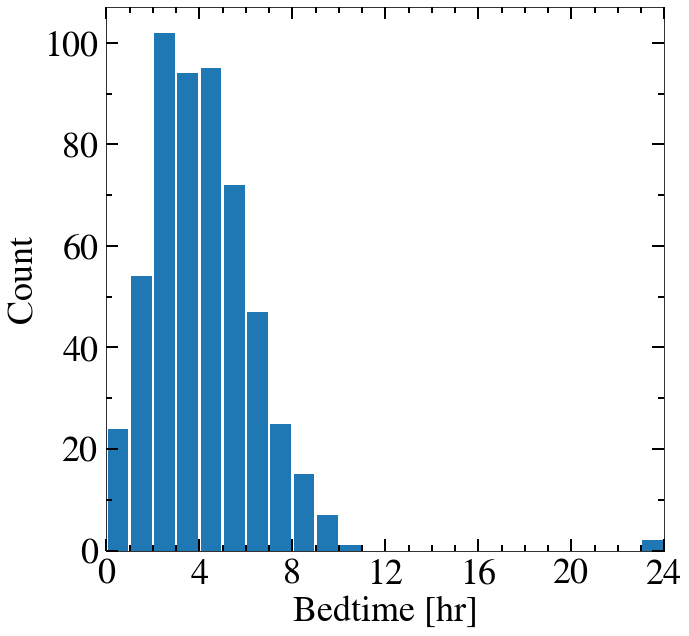

In [279]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)



xlabel = r'Bedtime [hr]'
ylabel = r'Count'
ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel(ylabel, fontsize=fs)
ax.set_xlim(0., 24.)
ax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax.tick_params('both', length=12, width=2., which='major',
                    direction='in', right=True, top=True)
ax.tick_params('both', length=6, width=2., which='minor',
                    direction='in', right=True, top=True) 
ax.xaxis.set_minor_locator(MultipleLocator(1.))
ax.xaxis.set_major_locator(MultipleLocator(4.))
ax.yaxis.set_minor_locator(MultipleLocator(10.))
ax.yaxis.set_major_locator(MultipleLocator(20.))
#Plot data.
ax.hist(data['bedtime_hour'].values, bins=np.arange(0,24.1,1), rwidth=0.9)

#### Sleep duration

(array([ 0.,  0.,  0.,  0.,  2.,  5., 13., 12., 35., 55., 73., 96., 75.,
        78., 46., 26., 10.,  8.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.,
        330., 360., 390., 420., 450., 480., 510., 540., 570., 600., 630.,
        660., 690., 720.]),
 <a list of 24 Patch objects>)

<Figure size 432x288 with 0 Axes>

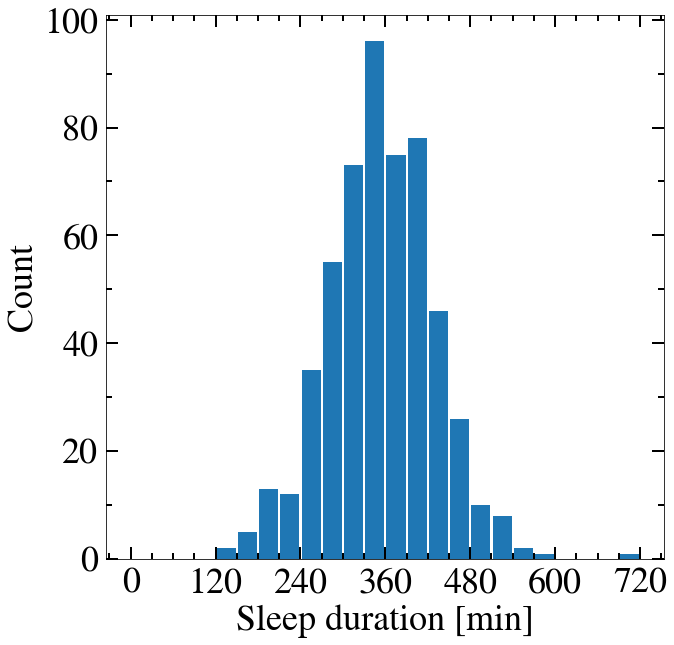

In [281]:
plt.clf()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

xlabel = r'Sleep duration [min]'
ylabel = r'Count'
ax.set_xlabel(xlabel, fontsize=fs)
ax.set_ylabel(ylabel, fontsize=fs)
#ax.set_xlim(0., 24.)
ax.tick_params(axis='y', which='major', labelsize=fs, pad=8)      
ax.tick_params(axis='x', which='major', labelsize=fs, pad=8)
ax.tick_params('both', length=12, width=2., which='major',
                    direction='in', right=True, top=True)
ax.tick_params('both', length=6, width=2., which='minor',
                    direction='in', right=True, top=True) 
ax.xaxis.set_minor_locator(MultipleLocator(30.))
ax.xaxis.set_major_locator(MultipleLocator(120.))
ax.yaxis.set_minor_locator(MultipleLocator(10.))
ax.yaxis.set_major_locator(MultipleLocator(20.))

#Plot data.
ax.hist(data['duration'].values*60., bins=np.arange(0,720.1,30), rwidth=0.9)

#### Sleep Duration Over Time


#### Sleep Quality Over Time